# Overview

This note is written the basic MNIST sample.

# Initial Setting

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20200426)
tf.random.set_seed(20200426)

print("tensorflow version : " + tf.__version__)

tensorflow version : 2.3.1


# Memory setting if you use GPU 

In [2]:
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.8

# Create input data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_val = x_train[:10000]
x_train = x_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_val.shape: ', x_val.shape)
print('y_val.shape: ', y_val.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train = x_train.reshape((len(x_train), 28*28)).astype('float32')
x_val = x_val.reshape((len(x_val), 28*28)).astype('float32')
x_test = x_test.reshape((len(x_test), 28*28)).astype('float32')
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255
print('\nx_train')
print(x_train)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print('\ny_train')
print(y_train)

x_train.shape:  (50000, 28, 28)
y_train.shape:  (50000,)
x_val.shape:  (10000, 28, 28)
y_val.shape:  (10000,)
x_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)

x_train
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

y_train
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Create deep learning layer

In [4]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax', name='y'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
y (Dense)                    (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Trainning

Epoch 1/10
391/391 [==============================] - 1s 4ms/step - loss: 0.3925 - accuracy: 0.8918 - val_loss: 0.2156 - val_accuracy: 0.9371
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 0.1789 - accuracy: 0.9487 - val_loss: 0.1549 - val_accuracy: 0.9557
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 0.1280 - accuracy: 0.9629 - val_loss: 0.1280 - val_accuracy: 0.9642
Epoch 4/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0994 - accuracy: 0.9713 - val_loss: 0.1172 - val_accuracy: 0.9659
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0792 - accuracy: 0.9765 - val_loss: 0.1050 - val_accuracy: 0.9669
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0652 - accuracy: 0.9816 - val_loss: 0.0995 - val_accuracy: 0.9688
Epoch 7/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0550 - accuracy: 0.9840 - val_loss: 0.0969 - val_accuracy: 0.9703
Epoch 

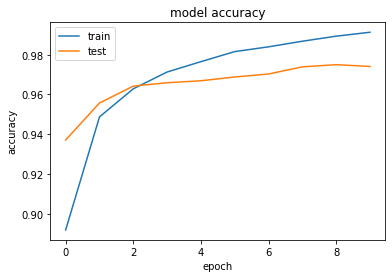

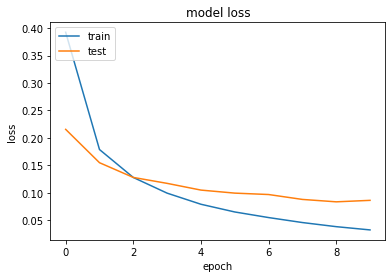

In [5]:
training = model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          batch_size=128,
          epochs=10)

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate

In [6]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9749


# Save the model

In [7]:
model.save('models\\mnist.h5')
model.save('models\\mnist_pb', save_format="tf")

print(model.input)
print(model.output)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models\mnist_pb\assets
Tensor("dense_input:0", shape=(None, 784), dtype=float32)
Tensor("y/Softmax:0", shape=(None, 10), dtype=float32)


# Predict

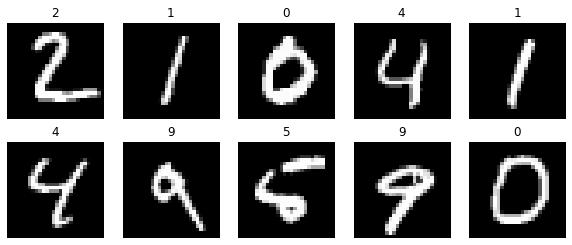

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((len(x_train), 28*28)).astype('float32')
x_test = x_test.reshape((len(x_test), 28*28)).astype('float32')
x_train = x_train / 255
x_test = x_test / 255

model = models.load_model('models\\mnist.h5')

#If the model format is pb
#model = models.load_model('models\\mnist_pb')

plt.figure(figsize=(10, 4))
num = 0

while num < 2 * 5:
    num += 1
    plt.subplot(2, 5, num)
    plt.imshow(x_test[num].reshape(28, 28), cmap="gray")
    plt.axis('off')
    
    x = x_test[num]
    x = x.reshape(1, len(x))
    plt.title(np.argmax(model.predict(x)))